Sentiment Analysis of Song Lyrics

Author: Sedrick Thomas

Notebook Abstract: Uncover patterns in your listening history using sentiment analysis and find artists who might post more positive or negative music
🎵

---

In [ ]:
import requests
from urllib.parse import urlencode
import base64

In [ ]:
client_id = "" # Enter your own client_id from spotify
client_secret = "" # Enter your own client_secret from spotify

auth_headers = {
    "client_id": client_id,
    "response_type": "code",
    "redirect_uri": "http://localhost:7777/callback",
    "scope": "user-library-read"
}

In [ ]:
url = "https://accounts.spotify.com/authorize?" + urlencode(auth_headers)

In [ ]:
url

'https://accounts.spotify.com/authorize?client_id=39ca199e2bf04a0e83549920f4a2835f&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A7777%2Fcallback&scope=user-library-read'

In [ ]:
code = '' # Copy and Paste the URL above into your browser and hit enter. It should redirect you and a new url will be shown. Copy the part of url that says code and paste it here

# Obtaining our Authorization Token

In [ ]:
encoded_credentials = base64.b64encode(client_id.encode() + b':' + client_secret.encode()).decode("utf-8")

In [ ]:
token_headers = {
    "Authorization": "Basic " + encoded_credentials,
    "Content-Type": "application/x-www-form-urlencoded"
}
token_data = {
    "grant_type": "authorization_code",
    "code": code,
    "redirect_uri": "http://localhost:7777/callback"
}

r = requests.post("https://accounts.spotify.com/api/token", data=token_data, headers=token_headers)

In [ ]:
r.status_code

200

In [ ]:
token = r.json()["access_token"]

Making a Request to Spotify's Track Endpoint

In [ ]:
max_songs = 200 # Change this value if you don't have 1,000 songs in your Liked Songs. Only enter in values in multiples of 50s e.g. 50, 100, 1000

In [ ]:
user_headers = {
    "Authorization": "Bearer " + token,
    "Content-Type": "application/json"
}
user_params = {
    "limit": 50
}

In [ ]:
iterations = max_songs // 50

In [ ]:
def get_list_of_songs(iterations, params, headers):
  """Retrieves list of songs in multiples of 50 due to API restrictions"""
  offset = 0 
  list_of_songs_json = []
  playlist_data = []
  for i in range(iterations):
    user_tracks_response = requests.get(f"https://api.spotify.com/v1/me/tracks?offset={offset}", params=user_params, headers=user_headers)
    list_of_songs_json.append(user_tracks_response.json())
    offset += 50

  for i in range(iterations):
    for y in range(len(list_of_songs_json[i]['items'])):
      song = list_of_songs_json[i]['items'][y]['track']['name'] # grabs song item 
      artist = list_of_songs_json[i]['items'][y]['track']['artists'][0]['name'] 
      date_added = list_of_songs_json[i]['items'][y]['added_at']
      playlist_data.append([song, artist, date_added])

  return playlist_data

In [ ]:
playlist = get_list_of_songs(iterations, user_params, user_headers) # Call method to get list of songs

In [ ]:
len(playlist)

200

In [ ]:
playlist

[['You Up?', 'Johan Lenox', '2023-02-12T15:29:35Z'],
 ['SKELETONS', 'Travis Scott', '2023-02-10T06:16:53Z'],
 ['So You Can Cry', 'Ne-Yo', '2023-02-07T16:34:15Z'],
 ['Baby', 'Summer Walker', '2023-02-06T17:01:18Z'],
 ['Tangled Up in You', 'The Altons', '2023-02-05T16:24:40Z'],
 ["THAT'S MY GIRL", 'Frank Sativa', '2023-02-05T16:16:37Z'],
 ['Come Home Soon', '00pium !*', '2023-02-05T16:12:44Z'],
 ["A Bird's Last Look", 'Macabre Plaza', '2023-02-05T16:03:02Z'],
 ['Perdido de Amor [Lost in Love]', 'Luiz Bonfá', '2023-02-05T15:54:03Z'],
 ["Jennah's Interlude", 'Blue Iverson', '2023-02-05T15:53:19Z'],
 ['Beautiful People', 'Chris Brown', '2023-02-04T14:25:04Z'],
 ['3005', 'Childish Gambino', '2023-02-03T19:52:55Z'],
 ['A Love of Your Own', 'Average White Band', '2023-02-03T16:49:20Z'],
 ['Views', 'Drake', '2023-02-02T18:05:16Z'],
 ['Coming Down', 'The Weeknd', '2023-01-31T05:06:20Z'],
 ['Somebody Else', 'The 1975', '2023-01-31T03:38:53Z'],
 ["i don't wanna fall in love, it's too late now",
  

In [ ]:
import pandas as pd

In [ ]:
playlist_df = pd.DataFrame(playlist, columns=['Track_Name', 'Artist', 'Date_Added'])

In [ ]:
playlist_df.head()

,Track_Name,Artist,Date_Added
0,You Up?,Johan Lenox,2023-02-12T15:29:35Z
1,SKELETONS,Travis Scott,2023-02-10T06:16:53Z
2,So You Can Cry,Ne-Yo,2023-02-07T16:34:15Z
3,Baby,Summer Walker,2023-02-06T17:01:18Z
4,Tangled Up in You,The Altons,2023-02-05T16:24:40Z


In [ ]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Track_Name  200 non-null    object
 1   Artist      200 non-null    object
 2   Date_Added  200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
playlist_df.to_csv('Playlist_Data.csv')

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def make_song_request(track, artist):
  url = 'https://api.musixmatch.com/ws/1.1/matcher.lyrics.get'
  key = '' # Enter your own key from Musixmatch
  req = requests.get(url, params={
    "apikey":key,
    "q_track": track,
    "q_artist": artist
  })
  data = req.json() # Converts request into json
  lyrics = data['message']['body']['lyrics']['lyrics_body']
  return lyrics # Return lyrics of song

In [ ]:
song = make_song_request("Find Your Love", "Drake") # Example

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [ ]:
"""Main Program Logic of retrieving lyrics from MusixMatch (Limit of 2k API calls a day) 200 songs took 19s to process"""

list_of_lyrics, sentiment_scores, overall_sentiment, positives, negatives, neutrals = ([] for i in range(6)) # Make all these variables equal to empty list

for i in range(len(playlist_df)):
  song = playlist_df.iloc[i][0]
  artist = playlist_df.iloc[i][1]
  try:
    # Retrieve lyrics
    lyrics = make_song_request(song, artist)
  except:
    # Assign them to null value if we can't retrieve lyrics 
    list_of_lyrics.append(None)
    sentiment_scores.append(None)
    overall_sentiment.append(None)
    positives.append(None)
    negatives.append(None)
    neutrals.append(None)
    continue

  # Sentiment Analysis
  sentiment_score = analyser.polarity_scores(lyrics)
  pos = sentiment_score['pos']
  neg = sentiment_score['neg']
  neu = sentiment_score['neu']
  full_sentiment_score = sentiment_score['compound']

  # Sentiment Classifier
  if (full_sentiment_score >= 0.05):
    overall_sentiment.append("Positive")
  elif (full_sentiment_score <= -0.05):
    overall_sentiment.append("Negative")
  else:
    overall_sentiment.append("Neutral")

  sentiment_scores.append(full_sentiment_score)
  list_of_lyrics.append(lyrics)
  positives.append(pos)
  negatives.append(neg)
  neutrals.append(neu)


# Create new columns for the new data
playlist_df['lyrics'] = list_of_lyrics
playlist_df['sentiment_scores'] = sentiment_scores
playlist_df['overall_sentiment'] = overall_sentiment
playlist_df['pos'] = positives
playlist_df['neg'] = negatives
playlist_df['neu'] = neutrals

In [ ]:
playlist_df.head()

,Track_Name,Artist,Date_Added,lyrics,sentiment_scores,overall_sentiment,pos,neg,neu
0,You Up?,Johan Lenox,2023-02-12T15:29:35Z,You up?\nLiquor got me thinking I'm in love\nI...,0.6199,Positive,0.146,0.121,0.733
1,SKELETONS,Travis Scott,2023-02-10T06:16:53Z,"Yeah, yeah, yeah (Yeah, ooh)\n\nFeels like slo...",0.9559,Positive,0.406,0.000,0.594
2,So You Can Cry,Ne-Yo,2023-02-07T16:34:15Z,So it's over\nHe's with someone else and you k...,-0.3078,Negative,0.107,0.095,0.798
3,Baby,Summer Walker,2023-02-06T17:01:18Z,You got my heart working overtime\nYou got my ...,0.8625,Positive,0.248,0.054,0.698
4,Tangled Up in You,The Altons,2023-02-05T16:24:40Z,None,NaN,None,NaN,NaN,NaN


In [ ]:
len(playlist_df)

200

In [ ]:
playlist_df.isna().sum()

Track_Name            0
Artist                0
Date_Added            0
lyrics               16
sentiment_scores     16
overall_sentiment    16
pos                  16
neg                  16
neu                  16
dtype: int64

In [ ]:
playlist_df = playlist_df.dropna() # Drop rows that contain null values

In [ ]:
playlist_df.to_csv('SongLyricsDataset.csv')

In [ ]:
len(playlist_df)

184

In [ ]:
playlist_df.head()

,Track_Name,Artist,Date_Added,lyrics,sentiment_scores,overall_sentiment,pos,neg,neu
0,You Up?,Johan Lenox,2023-02-12T15:29:35Z,You up?\nLiquor got me thinking I'm in love\nI...,0.6199,Positive,0.146,0.121,0.733
1,SKELETONS,Travis Scott,2023-02-10T06:16:53Z,"Yeah, yeah, yeah (Yeah, ooh)\n\nFeels like slo...",0.9559,Positive,0.406,0.000,0.594
2,So You Can Cry,Ne-Yo,2023-02-07T16:34:15Z,So it's over\nHe's with someone else and you k...,-0.3078,Negative,0.107,0.095,0.798
3,Baby,Summer Walker,2023-02-06T17:01:18Z,You got my heart working overtime\nYou got my ...,0.8625,Positive,0.248,0.054,0.698
5,THAT'S MY GIRL,Frank Sativa,2023-02-05T16:16:37Z,"Oh, that's my girl (my girl)\nCall me when she...",0.0000,Neutral,0.000,0.000,1.000


In [ ]:
playlist_df['Date_Added'] = playlist_df['Date_Added'].str[0:10] # Format the date column
playlist_df['Date_Added'] = pd.to_datetime(playlist_df['Date_Added']) # Convert Date Column to datetime

In [ ]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Track_Name         184 non-null    object        
 1   Artist             184 non-null    object        
 2   Date_Added         184 non-null    datetime64[ns]
 3   lyrics             184 non-null    object        
 4   sentiment_scores   184 non-null    float64       
 5   overall_sentiment  184 non-null    object        
 6   pos                184 non-null    float64       
 7   neg                184 non-null    float64       
 8   neu                184 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 14.4+ KB


In [ ]:
playlist_df = playlist_df.sort_values(by=['Date_Added'])

In [ ]:
playlist_df

,Track_Name,Artist,Date_Added,lyrics,sentiment_scores,overall_sentiment,pos,neg,neu
199,Super Freaky Girl,Nicki Minaj,2022-08-17,"She's alright\nThat girl's alright with me, ye...",0.0934,Positive,0.079,0.067,0.853
195,"Hello, It's Me",Groove Theory,2022-08-17,"Hello it's me,\nI've thought about us for a lo...",-0.7564,Negative,0.053,0.112,0.834
198,This Woman's Work - Remastered 2021,Maxwell,2022-08-17,Pray God you can cope\nI'll stand outside\nThi...,0.8474,Positive,0.124,0.030,0.847
197,Sweet Thing,Rufus,2022-08-17,I will love you any way\nEven if you cannot st...,0.9461,Positive,0.190,0.042,0.768
196,The Sweetest Thing (feat. Lauryn Hill) - From ...,Refugee Camp All-Stars,2022-08-17,The sweetest thing I've ever known\nWas like t...,0.9636,Positive,0.239,0.074,0.687
...,...,...,...,...,...,...,...,...,...
5,THAT'S MY GIRL,Frank Sativa,2023-02-05,"Oh, that's my girl (my girl)\nCall me when she...",0.0000,Neutral,0.000,0.000,1.000
3,Baby,Summer Walker,2023-02-06,You got my heart working overtime\nYou got my ...,0.8625,Positive,0.248,0.054,0.698
2,So You Can Cry,Ne-Yo,2023-02-07,So it's over\nHe's with someone else and you k...,-0.3078,Negative,0.107,0.095,0.798
1,SKELETONS,Travis Scott,2023-02-10,"Yeah, yeah, yeah (Yeah, ooh)\n\nFeels like slo...",0.9559,Positive,0.406,0.000,0.594


In [ ]:
import plotly.express as px
 
# Loading the iris dataset
 
fig = px.bar(playlist_df, x="Track_Name", y="sentiment_scores")
fig.show()

In [ ]:
# Make column for month_year
playlist_df['month_year'] = playlist_df['Date_Added'].dt.to_period('M')

In [ ]:
len(playlist_df)

184

In [ ]:
month_years = playlist_df['month_year'].unique()
month_years = sorted(month_years)

In [ ]:
pos_df = playlist_df.groupby('month_year')['pos'].sum().to_frame()

In [ ]:
pos_df

,pos
month_year,
2022-08,5.359
2022-09,4.593
2022-10,3.907
2022-11,2.602
2022-12,5.961
2023-01,3.764
2023-02,1.661


In [ ]:
pos_df['pos']

month_year
2022-08    5.359
2022-09    4.593
2022-10    3.907
2022-11    2.602
2022-12    5.961
2023-01    3.764
2023-02    1.661
Freq: M, Name: pos, dtype: float64

In [ ]:
pos_df.describe()

,pos
count,7.000000
mean,3.978143
std,1.501687
min,1.661000
25%,3.183000
50%,3.907000
75%,4.976000
max,5.961000


In [ ]:
neg_df = playlist_df.groupby('month_year')['neg'].sum().to_frame()

In [ ]:
neu_df = playlist_df.groupby('month_year')['neu'].sum().to_frame()

In [ ]:
neu_df.describe()

,neu
count,7.000000
mean,20.211286
std,7.003949
min,7.835000
25%,17.541500
50%,21.995000
75%,23.050500
max,30.465000


In [ ]:
# Find the general sentiment behind a specific artists based upon the tracks they put out
# Drake - Mostly Sad Music .66

Find The Type of Music You Listen to over time

In [ ]:
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure

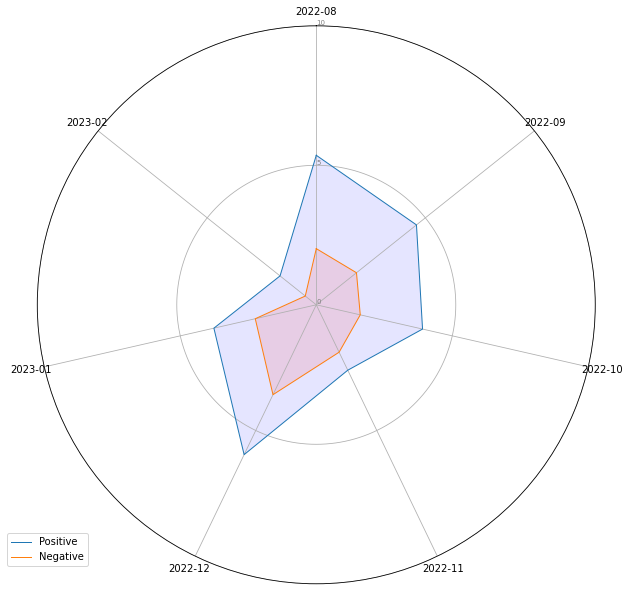

In [ ]:
"""Radar Chart"""
 
# number of variable
categories= month_years
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,5,10], ["0","5","10"], color="grey", size=7)
plt.ylim(0,10)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pos_df['pos'].to_list()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Positive")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=neg_df['neg'].to_list()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Negative")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.gcf().set_size_inches(10, 20)

# Show the graph
plt.show()

([<matplotlib.patches.Wedge at 0x7f53e2bf4670>,
 [Text(-0.5875052957081484, 0.9299664120358764, 'Positive'),
  Text(0.5226724580962313, -0.9678912653535228, 'Negative'),
  Text(1.0974356345931857, -0.07506682306486655, 'Neutral')],
 [Text(-0.32045743402262633, 0.5072544065650234, '67.9%'),
  Text(0.28509406805248977, -0.5279406901928305, '29.9%'),
  Text(0.5986012552326467, -0.04094553985356356, '2.2%')])

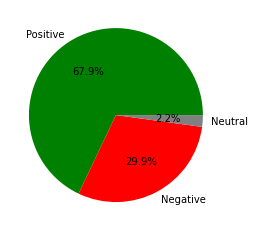

In [ ]:
# Pie chart
pie_counts = playlist_df['overall_sentiment'].value_counts().to_list()
labels = ['Positive', 'Negative', 'Neutral']

fig, ax = plt.subplots()
ax.pie(pie_counts, labels=labels, autopct='%1.1f%%',
       colors=['green','red', 'grey'])

# Search Artist Songs (Exercise)

In [ ]:
def find_artist_songs(artist_name):
  """Method to find top tracks for specific artist -> Returns artist name and list of top songs"""
  songs = []
  artist_name_modified = artist_name.replace(' ', '+')
  user_tracks_response = requests.get(f"https://api.spotify.com/v1/search?q={artist_name_modified}&type=artist", params=user_params, headers=user_headers)
  id = user_tracks_response.json()['artists']['items'][0]['id']# Grabs artist id

  top_tracks = requests.get(f'https://api.spotify.com/v1/artists/{id}/top-tracks?market=US', headers=user_headers) # Get artists' top tracks
  for i in range(5):
    songs.append(top_tracks.json()['tracks'][i]['name'])

  return artist_name, songs

In [ ]:
artist, songs = find_artist_songs("Childish Gambino")

In [ ]:
def radar_chart(pos_list, neg_list, labels):
  """Radar Chart"""
  
  # number of variable
  categories= labels
  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * math.pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(math.pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels
  plt.xticks(angles[:-1], categories)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
  plt.ylim(0,0.5)
  

  # ------- PART 2: Add plots
  
  # Plot each individual = each line of the data
  # I don't make a loop, because plotting more than 3 groups makes the chart unreadable
  
  # Ind1
  values=pos_list[:]
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label="Positive")
  ax.fill(angles, values, 'b', alpha=0.1)
  
  # Ind2
  values=neg_list[:]
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label="Negative")
  ax.fill(angles, values, 'r', alpha=0.1)
  
  # Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  plt.gcf().set_size_inches(10, 20)

  # Show the graph
  plt.show()

In [ ]:
def make_chart(artist, songs):
  pos_list = []
  neg_list = []
  lyric_list = []
  for i in range(len(songs)):
    song = songs[i]
    try:
      # Retrieve lyrics
      lyrics = make_song_request(song, artist)
    except:
      # Assign them to null value if we can't retrieve lyrics 
      list_of_lyrics.append(None)
      pos_list.append(None)
      neg_list.append(None)
      continue
    
    # Sentiment Analysis
    sentiment_score = analyser.polarity_scores(lyrics)
    pos = sentiment_score['pos']
    neg = sentiment_score['neg']

    pos_list.append(pos)
    neg_list.append(neg)
    lyric_list.append(lyrics)

  # Radar chart functionality
  radar_chart(pos_list, neg_list, songs)

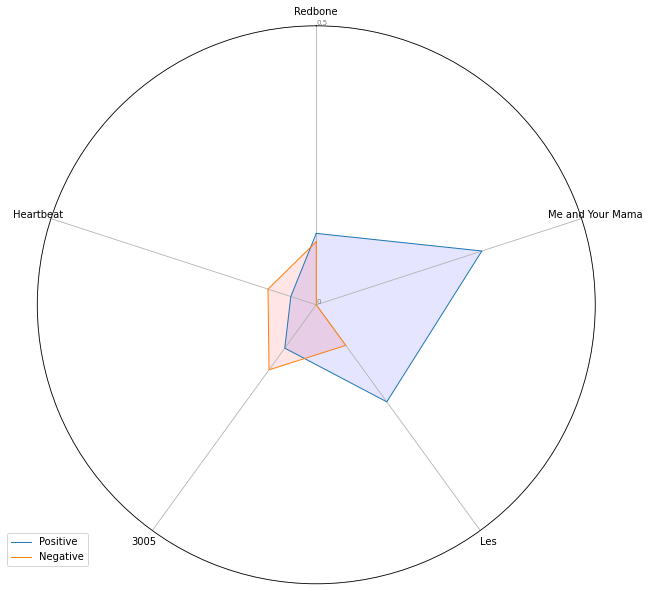

In [ ]:
make_chart(artist, songs) # Creates your own radar chart